## 5.7 More examples

Let's consider the production of succinic acid (SA) with a modified _E.coli_ strain. The metabolic network and model are given below:

<img src="Ecoli_SA.png" width="850" />

Note that the TCA cycle is operating in reverse on the $C_4$ section of the cycle. The $CO_2$ formation steps in the cycle are irreversible and thus the reverse TCA flux cannot continue beyond succinyl-CoA. This reverse flux is often referred to as the reductive TCA branch, while the normal 'clockwise' TCA flux is referred to as the oxidative route. Make sure that you can derive the given flux model yourself.

For this example the stoichiometric matrix was constructed in Excel. This is helpful since the columns are always in line. The first sheet of the file (SA_example.xlsx) looks like this:

<img src="xcel_snippet.png" width="650" />

The import tool will have the following command and will always import from the first sheet. Note the first row and column (in peach) is not imported:


In [1]:
import pandas, numpy
pandas.read_excel('SA_example.xlsx')

,1,2,3,4,5,6,7,8,9,10
1,1.1,1.000000,0.000000,0.00,0.0,0,0.000000,0.00,0,0
2,0.0,-1.000000,1.500000,0.75,0.0,0,0.000000,0.00,0,0
3,0.0,0.000000,0.000000,-1.00,1.0,1,0.000000,0.00,0,0
4,0.0,0.000000,1.000000,0.00,0.0,1,-1.000000,0.00,0,0
5,0.0,0.000000,0.000000,0.00,1.0,0,0.000000,1.00,-1,0
6,0.0,0.000000,-2.000000,0.00,0.0,1,0.000000,0.00,0,0
7,0.0,0.000000,0.000000,0.00,0.0,0,-0.666667,1.00,0,0
8,0.1,0.333333,0.500000,0.00,-0.5,0,0.000000,0.50,0,-2
9,-1.8,0.000000,0.333333,-0.25,0.0,0,0.000000,0.25,0,3
10,0.0,0.000000,0.000000,0.00,0.0,0,0.000000,0.00,0,1


You can also read the xcel file directly into a numpy matrix.

In [2]:
M = numpy.matrix(pandas.read_excel('SA_example.xlsx'))

You can now perform the usual calculation. We'll start by specifying a zero oxygen flux ($v_{10}=0$).

In [3]:
%pylab inline
Yso=0;
C = numpy.matrix([[1,0,0,0,0,0,0,0,0,Yso]]).T
Y = numpy.linalg.solve(M,C)
Y

Populating the interactive namespace from numpy and matplotlib


matrix([[-0.12807882],
        [ 1.1408867 ],
        [ 0.11231527],
        [ 1.29655172],
        [ 1.07192118],
        [ 0.22463054],
        [ 0.33694581],
        [ 0.22463054],
        [ 1.29655172],
        [ 0.        ]])

You will see that the model result in a negative biomass flux and thus the system is not physically realisable. The reason is that there is an ATP shortage. To overcome this a selective amount of oxygen can be added. The drainage of NADH to form ATP will result in an increased flux in v3v3. This is required since additional NADH need to be produced (for consumption in oxidative phosphorylation). To illustrate the interactivity of Python we'll create a Python function that returns the result form the flux model, given a specific choice of $Y_{SO}$.

In [4]:
def distr(Yso):

    C = numpy.matrix([[1,0,0,0,0,0,0,0,0,Yso]]).T
    Y = numpy.linalg.solve(M,C)

    Ysx=Y[0]  #biomass yield
    Ysp=Y[8]  #SA yield 
    Pyr_split=1.5*Y[2]/(0.75*Y[3]) # Pyruvate to AcCoA devided by pyruvate to OXA

    
    y = [Ysx, Ysp, Pyr_split]
    N = len(y)
    x = range(N)
    width = 1/1.5
    plt.bar(x, y, width, color="blue")
    plt.ylim(-0.2, 1.2)
    plt.xticks(numpy.array(x) + 0.5, ['Ysx', 'Ysp', 'Pyr_split'])
    plt.show()

Note that we can now 'call' the function for a chosen value of $Y_{SO}$. Below the plot for  $Y_{SO}=0.1$ 

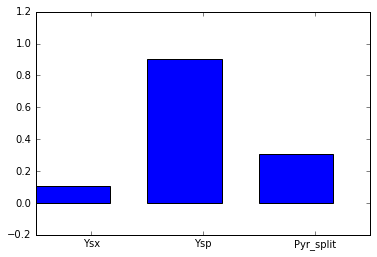

In [5]:
distr(0.1)

With Python it is easy to generate an interactive plot. The result is that you can vary $Y_{SO}$ with your mouse.

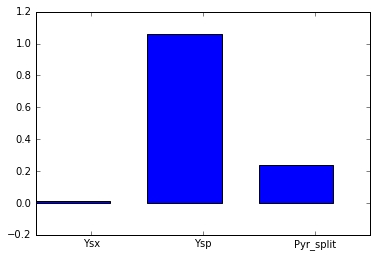

In [6]:
from ipywidgets import interact
interact(distr, Yso=(0., 0.14, 0.01))

What do we learn from the animation? That oxygen is required to obtain energy for building biomass, but that the SA yield decrease (and $Y_{SX}$ increase) as we increase the oxygen flux. From the pyruvate split you should see how more carbon is channelled to the oxidative side of the TCA cycle in order to generate more NADH for oxidative phosphorylation.

**For extra insight:** It is possible to put the 'magic' gene from _Actinobacillus succinogenes_ (see tut 7) that codes for PEP carboxikinase into _E. Coli_. This implies that the reductive TCA stream can start form PEP and **obtain an ATP in making OXA** unlike the PEP to OXA route in the example that is ATP neutral. Include this into a new flux model to see if this GMO will be able to operate under anaerobic conditions. [$Y_{SP}=1.093$ given the same parameters as the example] 

## 5.8 Matrix handling tools

### Rank of the stoichiometric matrix

Your flux model will always result in a square matrix since the number of equations (rows) must equal the number of fluxes (columns). The size of the matrix will be given by the number of columns (or rows). For matrix of size n, you need to have n independent equations to solve for the answer. You can check the number of independent equations by determining the rank of the stoichiometric matrix. Below the command for the class example in Chapter 5_1. Here is the matrix again:

$$\begin{bmatrix}
&v_1&v_2&v_3&v_4&v_5&v_6&v_7&v_8\\
eq_1 &(1+\alpha)  &1 &	0&	0&	0&	0&	0&0\\
eq_2 & 0	&1	&-1	&-1	&0	&0	&0	&0\\
eq_3 & 0&	0&	0&	1&	-1&	-1&	0&	0\\
eq_4 & 0&	0&	0&	0&	0&	1&	-1&	-1\\
eq_5 & 0&	0&	0&	0&	0&	-\frac{1}{3} &	1&	0\\
eq_6 & \beta &	0&	-\frac{1}{3} &	\frac{1}{3} &	-\frac{1}{3} &	0&	0&	0\\
eq_7 & -\gamma &	-\frac{1}{3} &	0 &	\frac{2}{3} &	0&	0&	0&	\frac{1}{2}\\
eq_8 & 0&	0&	0&	0&	1&	0&	0&	0\end{bmatrix}
\times\begin{bmatrix}
v_1\\v_2\\v_3\\v_4\\v_5\\v_6\\v_7\\v_8\end{bmatrix}
=\begin{bmatrix}1\\0\\0\\0\\0\\0\\0\\0.28\end{bmatrix}$$

In [7]:
import numpy
S = numpy.matrix([[1.1,1,0,0,0,0,0,0],
[0,1,-1,-1,0,0,0,0],
[0,0,0,1,-1,-1,0,0],
[0,0,0,0,0,1,-1,-1],
[0,0,0,0,0,-1/3,1,0],
[0.1,0,-1/3,1/3,-1/3,0,0,0],
[-1.8,-1/3,0,2/3,0,0,0,0.5],
[0,0,0,0,1,0,0,0],
],dtype=float)

from numpy.linalg import matrix_rank
a=matrix_rank(S)
a

8

So the rank is the same as the size, we thus have 8 independent equations. Let’s alter the last equation to include a linear dependent relationship. Here is the map and model again.

<img src="example1.png" width="600" />


We’ll specify $v_8$ to be $\frac{2}{3}v_6$ for the last equation.

In [8]:
S = numpy.matrix([[1.1,1,0,0,0,0,0,0],
[0,1,-1,-1,0,0,0,0],
[0,0,0,1,-1,-1,0,0],
[0,0,0,0,0,1,-1,-1],
[0,0,0,0,0,-1/3,1,0],
[0.1,0,-1/3,1/3,-1/3,0,0,0],
[-1.8,-1/3,0,2/3,0,0,0,0.5],
[0,0,0,0,0,2/3,0,-1],        # Linear dependant specification!
],dtype=float)

from numpy.linalg import matrix_rank
a=matrix_rank(S)
a

7

**The rank is now 1 lower than the size of the matrix and a solution won't be possible!**

### Solving for unknowns in the stoichiometric matrix

Let’s take the same example from chapter 5_1. Assume that $\gamma$ is not known. We’ll use the original formulation in sympy to express the yield coefficients as a function of the unknown $\gamma$.

In [9]:
import sympy
sympy.init_printing(use_latex='mathjax')
from sympy import symbols
gamma = sympy.Symbol('gamma')

#a, b = symbols('alpha')

S = sympy.Matrix([[1.1,1,0,0,0,0,0,0],
[0,1,-1,-1,0,0,0,0],
[0,0,0,1,-1,-1,0,0],
[0,0,0,0,0,1,-1,-1],
[0,0,0,0,0,-1/3,1,0],
[0.1,0,-1/3,1/3,-1/3,0,0,0],
[-gamma,-1/3,0,2/3,0,0,0,0.5],
[0,0,0,0,1,0,0,0],])

C = sympy.Matrix([[1,0,0,0,0,0,0,0.28]]).T

Y = S.inv()*C
Y2=sympy.simplify(Y)
Y2

⎡           1.0⋅(0.326530612244898⋅γ + 0.185034013605442)             ⎤
⎢    ────────────────────────────────────────────────────────────     ⎥
⎢                      2                                              ⎥
⎢    1.53061224489796⋅γ  + 1.37755102040816⋅γ + 0.289115646258503     ⎥
⎢                                                                     ⎥
⎢     ⎛                  2                                         ⎞  ⎥
⎢ 1.0⋅⎝1.53061224489796⋅γ  + 1.01836734693878⋅γ + 0.085578231292517⎠  ⎥
⎢ ──────────────────────────────────────────────────────────────────  ⎥
⎢                      2                                              ⎥
⎢    1.53061224489796⋅γ  + 1.37755102040816⋅γ + 0.289115646258503     ⎥
⎢                                                                     ⎥
⎢    ⎛                   2                                           ⎞⎥
⎢1.0⋅⎝0.551020408163265⋅γ  + 0.365306122448979⋅γ + 0.0300680272108844⎠⎥
⎢───────────────────────────────────────────────────────────────

We need to know one more yield (or flux) to solve for $\gamma$. We'll take the glycerol flux and solve.

In [10]:
sympy.solve(Y2[2] - 0.32, gamma) #v3 the glycerol flux is known

[1.80000000000001]

We should aso get same the answer using any of the other known yields. Take the biomass flux for example ($v_1$) 

In [11]:
sympy.solve(Y2[0] - 0.1, gamma) #v1 biomass flux

[1.8]

### Easy as py(thon)!

<img src="larson1.png" width="350" />
